In [ ]:
from matplotlib import pyplot as plt
from meta.rsi_and_ema_custom_env import RsiAndEmaCustomEnv
from utils.charts.plot_data_with_rsi import plot_data_with_rsi
from utils.fetch_data_with_indicators import Api, fetch_data_with_indicators
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.env_checker import check_env

data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2015-01-01', '2023-01-01', '1d', ['RSI', 'EMA_20', 'EMA_50', 'EMA_100'])

env = RsiAndEmaCustomEnv(data, action_space=3, observation_space=12)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1_000_000, log_interval=100000)

[*********************100%***********************]  1 of 1 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


[*********************100%***********************]  1 of 1 completed


Step: 1, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 9000.0, Token Amount: 0.033689699457118756
Step: 2, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 8100.0, Token Amount: 0.06342670152748539
Step: 3, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 7290.0, Token Amount: 0.09027525603023129
Step: 4, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 6561.0, Token Amount: 0.11423227465269362
Step: 5, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 5904.9, Token Amount: 0.1357323194867276
Step: 6, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 5314.41, Token Amount: 0.15518907315207858
Step: 7, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 4782.969, Token Amount: 0.1727019655721354
Step: 8, Last Action: 0, Reward: 0, Total Reward: 0.0, Balance Before: 0, Balance: 4304.6721, Token Amount: 0.1889294362507

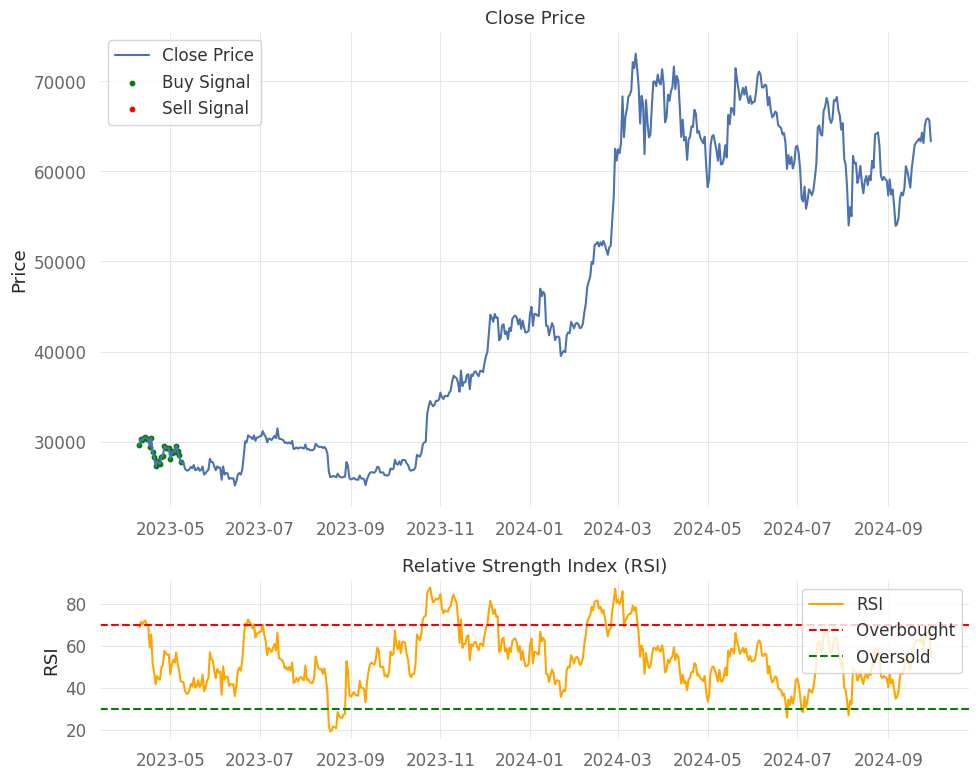

                    Strategy
------------------  ----------
Start Period        2023-04-10
End Period          2024-09-29
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   116.74%
CAGR﹪              43.67%

Sharpe              1.14
Prob. Sharpe Ratio  95.49%
Sortino             1.8
Sortino/√2          1.28
Omega               1.23

Max Drawdown        -25.67%
Longest DD Days     200

Gain/Pain Ratio     0.23
Gain/Pain (1M)      1.85

Payoff Ratio        1.21
Profit Factor       1.23
Common Sense Ratio  1.49
CPC Index           0.75
Tail Ratio          1.21
Outlier Win Ratio   4.21
Outlier Loss Ratio  3.97

MTD                 11.03%
3M                  8.6%
6M                  -7.08%
YTD                 53.45%
1Y                  135.58%
3Y (ann.)           43.67%
5Y (ann.)           43.67%
10Y (ann.)          43.67%
All-time (ann.)     43.67%

Avg. Drawdown       -5.33%
Avg. Drawdown Days  21
Recovery Factor     3.61
Ulcer Index         0.11
Serenity Index      

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


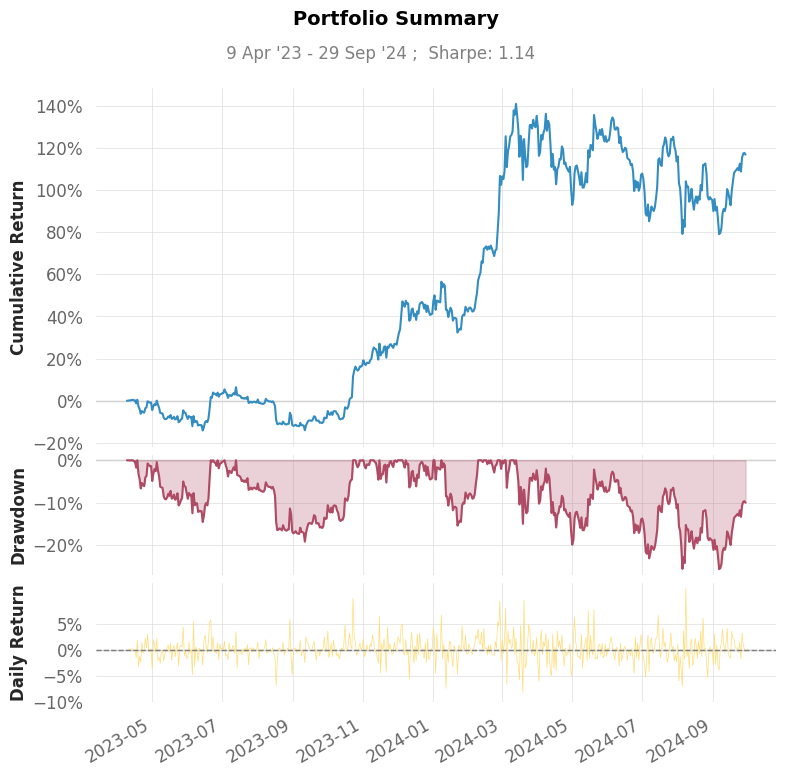

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


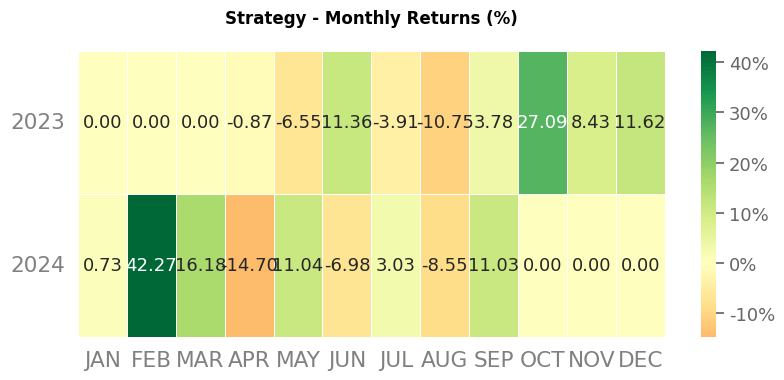

In [2]:
import pandas as pd
import quantstats as qs

test_data = fetch_data_with_indicators(Api.YAHOO, 'BTC-USD', '2023-01-01', '2024-10-01', '1d', ['RSI', 'EMA_20', 'EMA_50', 'EMA_100'])

test_env = RsiAndEmaCustomEnv(test_data, action_space=3, observation_space=12)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation, deterministic=True)
    done, info = test_env.test_step(action)
    
    test_env.render()
    portfolio_values.append(info['portfolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_data_with_rsi(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)

Step: 1, Last Action: 0, Reward: -1, Total Reward: -1.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 2, Last Action: 1, Reward: -1, Total Reward: -2.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 3, Last Action: 0, Reward: -1, Total Reward: -3.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 4, Last Action: 1, Reward: -1, Total Reward: -4.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 5, Last Action: 1, Reward: -1, Total Reward: -5.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 6, Last Action: 1, Reward: -1, Total Reward: -6.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 7, Last Action: 0, Reward: -1, Total Reward: -7.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 8, Last Action: 0, Reward: -1, Total Reward: -8.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 9, Last Action: 1, Reward: -1, Total Reward: -9.0, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 10, Last Action: 2, Re

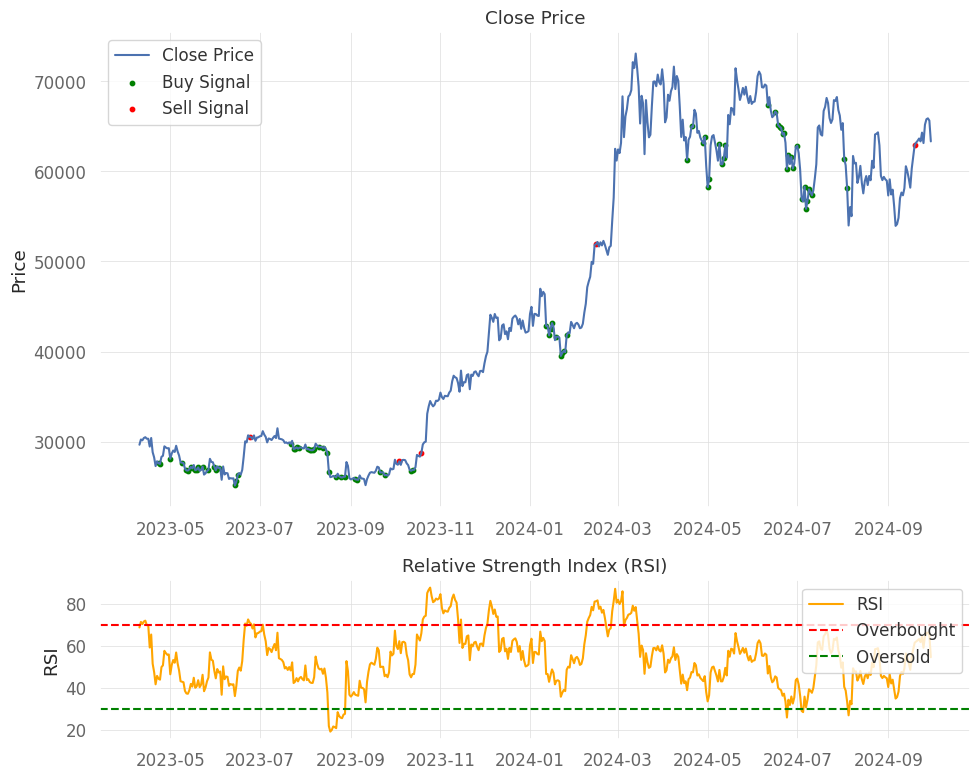

                    Strategy
------------------  ----------
Start Period        2023-04-10
End Period          2024-09-29
Risk-Free Rate      0.0%
Time in Market      63.0%

Cumulative Return   26.01%
CAGR﹪              11.44%

Sharpe              0.59
Prob. Sharpe Ratio  80.84%
Sortino             0.92
Sortino/√2          0.65
Omega               1.16

Max Drawdown        -20.76%
Longest DD Days     182

Gain/Pain Ratio     0.16
Gain/Pain (1M)      1.22

Payoff Ratio        1.24
Profit Factor       1.16
Common Sense Ratio  1.39
CPC Index           0.69
Tail Ratio          1.2
Outlier Win Ratio   8.81
Outlier Loss Ratio  3.97

MTD                 6.36%
3M                  4.32%
6M                  0.87%
YTD                 15.99%
1Y                  20.4%
3Y (ann.)           11.44%
5Y (ann.)           11.44%
10Y (ann.)          11.44%
All-time (ann.)     11.44%

Avg. Drawdown       -3.75%
Avg. Drawdown Days  29
Recovery Factor     1.38
Ulcer Index         0.06
Serenity Index      0.58


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


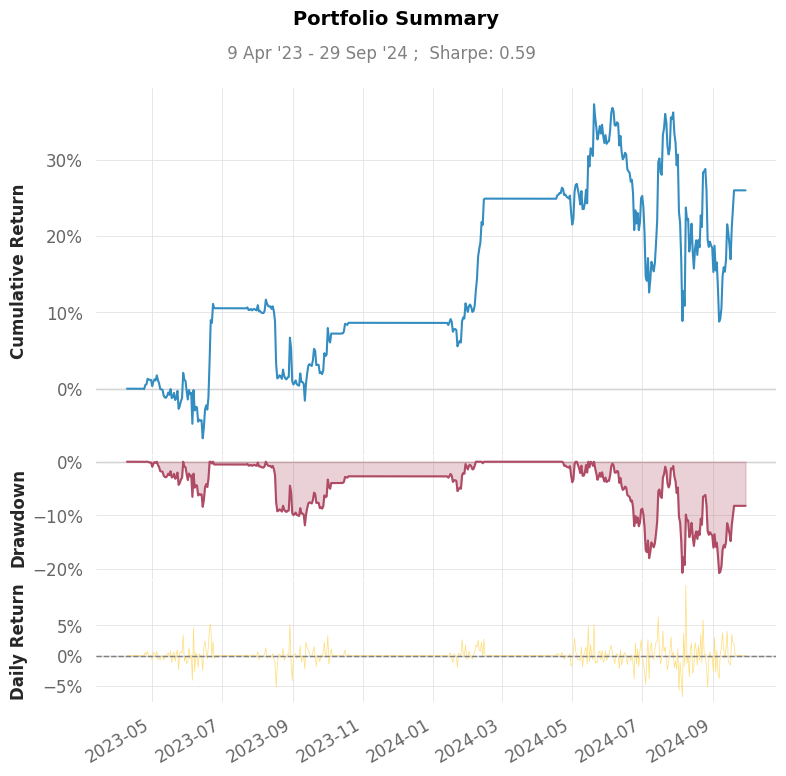

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


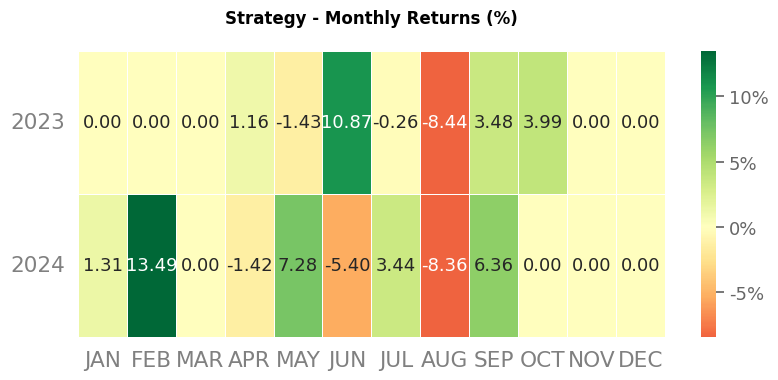

In [3]:
check_env(test_env)

portfolio_values = []
actions_data = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    test_env.render()
    portfolio_values.append(info['portfolio_value'])
    done = terminated or truncated

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_data_with_rsi(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)